In [0]:
import numpy as np
import keras
from keras import Sequential, Model
from keras.layers import Conv2D, UpSampling2D, concatenate, Input, Reshape, Conv2DTranspose
import cv2
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')
gi4e_X = np.load('/content/drive/My Drive/eye_trackdata/gi4e_X.npy')/255
gi4e_Y = np.load('/content/drive/My Drive/eye_trackdata/pure_gi4e_Y.npy')/255
X_train, X_test, y_train, y_test = train_test_split(gi4e_X, gi4e_Y, test_size=0.3, random_state=42)
X_test.shape


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


(742, 48, 48, 1)

In [0]:
# load fiiting data
fitting_x = np.load('/content/drive/My Drive/eye_trackdata/fitting_x.npy', allow_pickle=True)/255
fitting_y = np.load('/content/drive/My Drive/eye_trackdata/fitting_y.npy', allow_pickle=True)/255
# fitting_x = np.array(fitting[:,1])
fitting_x = fitting_x.reshape(500,48,48,1)
fitting_y = fitting_y.reshape(500,48,48,1)
# fit_x = 

In [0]:
y_train.shape

(1730, 48, 48, 1)

In [0]:
activation = 'tanh'
inlayer = Input(shape=(48, 48, 1))
x = Conv2D(64, (3, 3),strides =(1,1), activation=activation, padding = 'same')(inlayer)
y = Conv2D(128, (3, 3),strides =(2,2), activation=activation, padding = 'same')(x)
y1 = Conv2D(256, (3, 3),strides =(2,2), activation=activation, padding = 'same')(y)
y = Conv2DTranspose(64, (3, 3),strides =(4,4), activation=activation, padding = 'same')(y1)
# y = UpSampling2D(size=(2, 2), interpolation='bilinear')(y1)
# y = Reshape((48, 48, 64))(y)

o = concatenate([x, y])
o = Conv2DTranspose(64, (3, 3),strides =(1,1), activation=activation, padding = 'same')(o)
o = Conv2DTranspose(1, (3, 3),strides =(1,1), activation=activation, padding = 'same')(o)

decoder = Conv2DTranspose(256, (3, 3),strides =(1,1), activation=activation, padding = 'same')(y1)
decoder = Conv2DTranspose(128, (3, 3),strides =(2,2), activation=activation, padding = 'same')(decoder)
decoder = Conv2DTranspose(64, (3, 3),strides =(2,2), activation=activation, padding = 'same')(decoder)
decoder = Conv2DTranspose(1, (3, 3),strides =(1,1), activation=activation, padding = 'same')(decoder)
# decoder = UpSampling2D(size=(2, 2), interpolation='bilinear')(decoder)
model1 = Model(inputs=inlayer,outputs=[o,decoder])
# model2 = Model(inputs=inlayer,outputs=[o,decoder])



In [0]:

# opt = SGD(lr=0.01)
model1.compile(optimizer='rmsprop',
              loss='mse')
# model2.compile(optimizer='rmsprop',
            #   loss='mse')

In [0]:
model1.fit(X_train, [y_train,X_train], epochs=100, batch_size=32)
# model2.fit(X_train, [y_train,X_train], epochs=100, batch_size=32)

In [0]:
# tune
model1.fit(fitting_x[:450], [fitting_y[:450],fitting_x[:450]], epochs=100, batch_size=32)

In [0]:
model.evaluate(X_test, [y_test,X_test])

742/742 [==============================] - 1s 724us/step


[0.0038609967932275763, 0.00043125213065807206, 0.0034297446693943917]

In [0]:
model.save('eye_CNN', model)

In [0]:
pic = fitting_x[sample,:,:,0]*255
# pic = cv2.imread('/content/yaf.jpg')
# pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
cv2.circle(pic, (26,24),1, 255)
plt.imshow(pic)

[[ 0 24 26  0]]
[[23 25  0]]


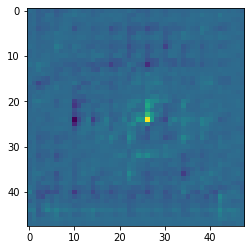

In [0]:
sample  = 452
pic1 = model1.predict(fitting_x[sample].reshape(1,48,48,1))[0]*255
# pic2 = model2.predict(X_test[sample].reshape(1,48,48,1))[0]*255
# pic = model.predict(pic.reshape(1,48,48,1)/255)[0]*255
plt.imshow(pic1[0,:,:,0])
point1 = np.argwhere(pic1.max() == pic1)
point2 = np.argwhere(fitting_y[sample].max() == fitting_y[sample])
# point2 = np.argwhere(pic2.max() == pic2)
print(point1)
print(point2)
# plt.imshow(pic1)

In [0]:
# !pip install tf-nightly
model.fit(frame)